##**Técnicas de Montecarlo**
El nombre *Monte Carlo* se aplica a métodos que proporcionan soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de *números aleatorios* o pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. A diferencia de los métodos numéricos que se basan en evaluaciones en N puntos en un espacio M-dimensional para producir una solución aproximada, el método de Montecarlo tiene un error absoluto de la estimación que decrece como $\dfrac{1}{\sqrt{N}}$ en virtud del teorema del límite central. Dicho nombre es debido a una pequeña ciudad de la riviera francesa famosa por sus casinos.

En términos más exactos, un Monte Carlo es un proceso estocástico numérico, es decir, una secuencia de estados cuya evolucion viene determinada por sucesos aleatorios. Recordemos que un suceso aleatorio es un conjunto de resultados que se producen con cierta probabilidad. Para que este método funcione, es necesario que nuestros números aleatorios coincidan tres criterios:

* Deben estar distribuidos uniformemente.
* No estar correlacionados.
* La cantidad de puntos debe de ser alta.

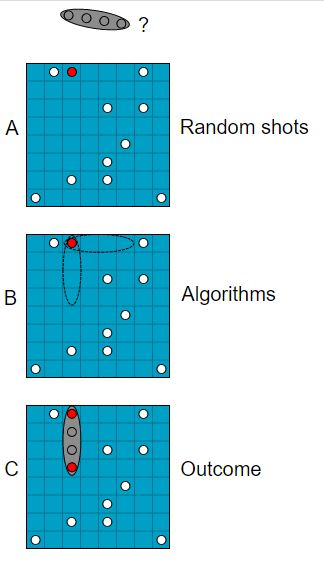

#**Generación de números aleatorios**
Generar números aleatorios es intrínsecamente difícil. Por lo general, renunciamos a los números verdaderamente aleatorios y usamos "pseudoaleatorio" en su lugar, secuencias de números. Si la secuencia de números cumple los criterios anteriormente mencionados, harán el trabajo incluso si no son técnicamente aleatorios.

Un ejemplo de un generador de números *pseudoaleatorios*, es el **generador lineal congruente (método de congruencia lineal)**:

$$r_{n+1}=(ar_n + c)\,\,mod\,\,M$$ 

$$r_{n+1} = residuo\left(\dfrac{ar_n + c}{M}\right)$$

Este generador de números pseudoaleatorios toma una "semilla" 
 y genera una serie de números que, dependiendo de las opciones que tengamos de $a$, $c$ y $M$, pueden cumplir los criterios necesarios para las técnicas de Monte Carlo.


**Ejemplo:** Tomamos $a = 4$, $c = 1$ y $M = 9$. Con una "semilla" inicial $r_0=3$

In [2]:
import numpy as np
a, c, M = 4, 1, 9    # secuencia 2

r = np.zeros(15)
r[0]=3
for i in range(0,14):
  r[i+1] = (a*r[i] + c)%M

print(r, end=", ")
  

[3. 4. 8. 6. 7. 2. 0. 1. 5. 3. 4. 8. 6. 7. 2.], 

Se puede notar que con el ejemplo anterior, la secuencia 3, 4, 8, 6, 7, 2, 0, 1, 5 se repite.

¿Qué sucede si cambiamos cada uno de los parámetros $a$, $c$, $M$?✅

`random.seed()` se utiliza para inicializar un generador de números aleatorios.

El generador de números aleatorios necesita un número con el que empezar (un valor semilla), para poder generar un número aleatorio.

In [4]:
import random

random.seed(10)
print(random.random())

0.5714025946899135



Otros ejemplos se muestran en la siguiente figura,

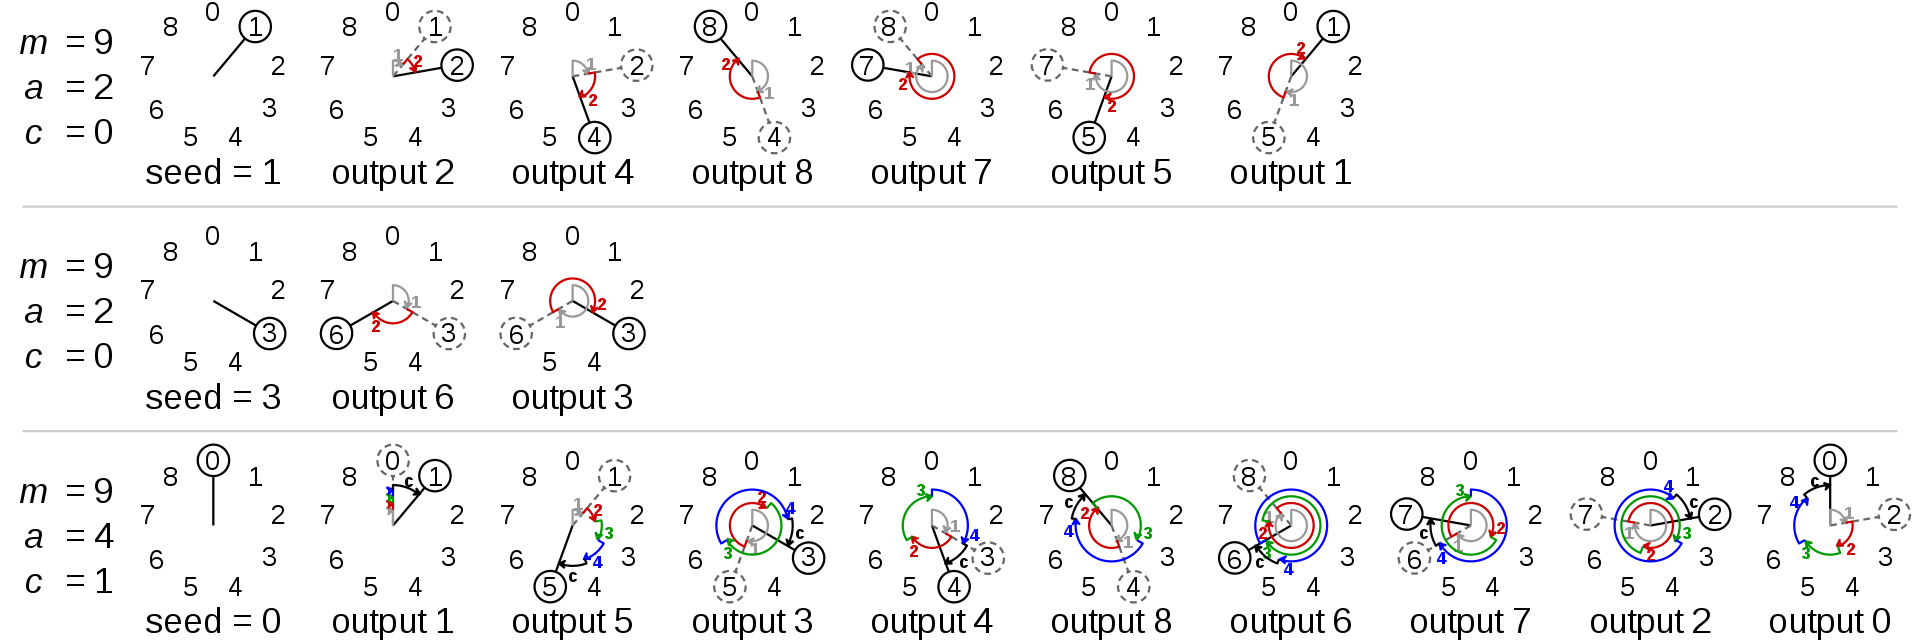



Este conjunto de parámetros se utilizó mucho en los años 70 y principios de los 80 es llamado "Randu". Estos parámetros tienen la ventaja de ser fácil de calcular para la computadora, por lo que fue posible generar grandes secuencias rápidamente. Sin embargo, hay un problema que no fue descubierto hasta mucho después: ¡la secuencia Randu está altamente correlacionada!

Python viene con un generador de números pseudoaleatorios llamado "Merseinne Twister ”. Este es un generador muy rápido, y ha sido ampliamente probado por la comunidad matemática. El generador Mersenne-Twister se desarrolló en 1997 por Makoto Matsumoto y Takuji Nishimura (Matsumoto and Nishimura (1998)), es el generador default en muchos programas, por ejemplo, en Python, Ruby, C++ estándar, Excel y Matlab (más aquí). Este generador tiene propiedades deseables como un periodo largo (2^19937-1) y el hecho que pasa muchas pruebas de aleatoriedad.


En lugar de utilizar nuestro propio generador de números pseudoaleatorios y correr el riesgo de caer en algún problema, usaremos el de python. Para acceder a estas rutinas de números aleatorios, se importa el paquete `random`

**Sintaxis:**

    #Paquete random
    `import random`

    random.random() # Genera un número psudoaleatorio entre 0 y 1

    random.uniform (a,b) # Genera un número psudoaleatorio entre a y b
    
    random.choice(lista) # Un elemento aleatorio de la lista
    
    random.gauss(mu,sigma) # elemento aleatorio que sigue la distribucion de    gauss

    random.randint(a,b) # Un número entero aleatorio en el rango a,b

La creación de números en el computador es "*seudo*" aleatoria, pues debido a su arquitectura estos no pueden crear números verdaderamente aleatorios.

**Ejemplo:** Generemos 15 números aleatorios entre 1 y 10

In [37]:
 #Paquete random
import random

for i in range(0,15):
    print(random.uniform(1,10), end=", ")

9.409555791284877, 9.85290878810504, 9.93729506551577, 8.570791255326649, 1.7548191142855492, 1.2907925416105386, 6.515460613753321, 8.342978144908106, 2.934679011894844, 1.672880463902698, 3.600142728891666, 2.1805302989242454, 1.2144506417479708, 3.247364813600744, 4.894961495441723, 

**Ejemplo:** Usando un generador linal congruente, graficar $r_{i+1}$ vs $r_i$ para $a = 57$, $c=1$, $M=256$ y $r_0=10$

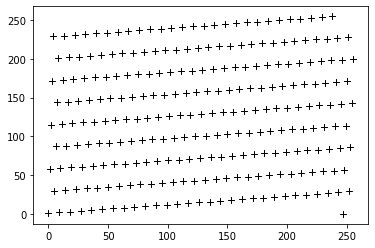

In [36]:
# Ejemplo libro Paez-Landau fig 4.1

import matplotlib.pyplot as plt

a,c,M,r1  = 57,1,256,10    # secuencia 2

for i in range(1000):
    r2 = (a*r1 + c)%(M)
    x, y = r1, r2
    r1 = r2
    
    plt.plot(x,y,"k+")

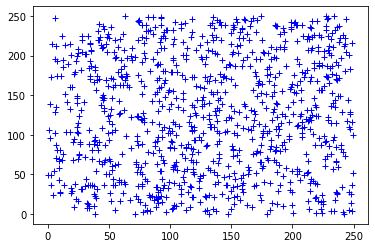

In [38]:
a,c,M,r1  = 57,1,256,10    # Utilizando random.rand...

for i in range(1000):
    r2 = (a*r1+c)%(M)
    x, y = r1, r2
    r1 = r2
    plt.plot(np.random.rand()*250,np.random.rand()*250,"b+")

Las variables aleatorias han llegado a desempeñar un papel importante en casi todos los campos de estudio: en la Física, la Química y la Ingeniería; y especialmente en las ciencias biológicas y sociales. Estas variables aleatorias son medidas y analizadas en términos de sus propiedades estadísticas y probabilísticas, de las cuales una característica subyacente es su función de distribución. A pesar de que el número potencial de distribuciones puede ser muy grande, en la práctica, un número relativamente pequeño se utilizan; ya sea porque tienen características matemáticas que las hace fáciles de usar o porque se asemejan bastante bien a una porción de la realidad, o por ambas razones combinadas.

#**[Generación de números aleatorios y distribuciones más usadas](#números_aleatorios)**
Dado que podemos generar números aleatorios uniformemente distribuidos con el computador, vamos a mostrar como generar números aleatorios con una distribución determinada. De las cuales, las más usadas son:

   + Distribución uniforme,
   + Distribución exponencial decreciente,
   + Distribución normal o gaussiana y teorema central del límite,
   + Distribución de poisson.

En general, todos los generadores de números seudoaleatorios se limitan a generar distribuciones uniformes en el intervalo $[0,1)$, entonces ¿cómo generar otras distribuciones a partir de esta?, las siguientes secciones explican como hacerlo; sin embargo, primero haremos un repaso de algunos conceptos de teoría de probabilidad.

## **Conceptos de teoria de probabilidad**
Cuando lanzamos un dado se puede obtener cualquier resultado del 1 al 6. Si lanzamos $n$ veces el mismo dado, tenemos $f_i$ observaciones de un evento $i$, por ejemplo de obtener el número 3, entonces la probabilidad $p_i$ de observar el evento $i$ es

$$p_i=\frac{f_i}{n}\,\,\,\,\, → \,\,\,\,\, \dfrac{casos\, favorables\, (obtener\, el\, número\, 3)}{número\, de\, lanzamientos\, del\, dado}$$

Si en un experimento cualquiera, la variable $i$ toma valores continuos $f_i\rightarrow f(x)$ entonces la probabilidad de obtener valores (realizaciones) de $x$ en el intervalo $[x,x+dx]$, es, 

$$p=f(x)dx\approx f(x_i)\Delta x$$ 

donde $f(x)$, se conoce como *función de densidad de probabilidad*, función de densidad, o simplemente densidad de una variable aleatoria continua, la cual, en otras palabras, describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor. Además, se impone la condición de normalización,

$$\int_{-\infty}^\infty f(x)dx=1,$$

por lo que otra vez $p$ toma valores entre cero y uno.

**Función de distibución** o función de distribución acumulada: nos da la probabilidad de encontrar un valor igual o menor que $x$, donde $F(x)$ toma valores uniformemente distribuidos en el intervalo $[0,1]$, se define por la integral,

$$F(x) = \int_{-\infty}^xf(x')dx',\quad \text{equivalente a}\quad F(k)=\sum_{i=1}^{k} p_i,\quad \text{con}\quad k\leq m.$$

Note que si $x=\infty$ entonces $F(\infty)=1$; en el caso discreto se cambia la integral por una suma.


**Distribución binomial**
Si una variable aleatoria discreta $X$ tiene una distribución binomial, su función de  probabilidad está dada por 

$$f(x;n,p) = \Pr(X = x) = \binom n x  p^x(1-p)^{n-x} = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x},$$

donde $\Pr(X = x)$ es la probabilidad de que un evento independiente ocurra $x$ veces en $n$ pruebas o ensayos. La probabilidad individual de que un evento ocurra se denota como  $p$; mientras que $1-p$ es la probabilidad de que no ocurra. 

Por ejemplo, si lanzamos 51 veces un dado de 6 caras y queremos calcular la probabilidad de que el número 3 salga 20 veces. Consideramos un éxito si obtenemos un 3 pero si no sale 3 lo consideramos como un fracaso. La probabilidad buscada es:

$$\Pr(X = 20) = \binom {51} {20}  (1/6)^{20}(1-(1/6))^{51-20} = 0.0000744$$


**Distribución Gaussiana**, esta distribución se obtiene como un caso limite de la distribución binomial cuando $n\to\infty$ (aunque para valores incluso de $n=10$ representa bien las propiedades de la distribución binomial), se representa por la función

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }.$$

Donde $\sigma=\sqrt{np(1-p)}$ es la desviación estándar y $\mu=np$ el valor medio.  

En un sentido más riguroso, el valor medio (`np.mean()`) se puede definir por,

$$
\mu   \equiv \langle x\rangle=\frac{1}{n}\sum_{i=1}^n x_i=\sum_{i=1}^m x_i p_i\\\\
$$

tenga en cuenta que cada $x_i$ se repite $f_i$ veces. Para saber el error, se mira cuanto es la diferencia de cada cantidad $x_i$ respecto al valor medio $\mu$, luego se calcula el promedio de estas diferencias al cuadrado, esto se conoce como la desviación estándar (`np.std()`) es decir,

$$
\begin{align}
\sigma&\equiv\sqrt{\langle (x-\mu)^2\rangle}=\sqrt{\frac{1}{n}\sum_{i=1}^n (x_i-\mu)^2}=\sqrt{\sum_{i=1}^m (x_i-\mu)^2p_i},\\
\sigma&=\sqrt{\langle x^2\rangle-\langle x\rangle^2},
\end{align}
$$

donde $\langle x^2\rangle=\sum_{i=1}^n x_i^2$. Además $\sigma^2=\,$var$(x)$, se conoce como varianza (`np.var()`) que es igual al valor promedio $\langle (x-\mu)^2\rangle$, es decir la varianza mide cuanto se desvía cada cantidad $x_i$ del promedio $\mu$. 

**La distribución de Poisson**, es otro caso especial de la distribución binomial, se da cuando $n\to\infty$ pero $p\to 0$ tal que $np$ es constante.

$$f(x) = e^{-\mu}\frac{\mu^x}{x!}.$$

Para los siguientes ejemplos vamos hacer usos de histogramas por medio de la siguiente herramienta,

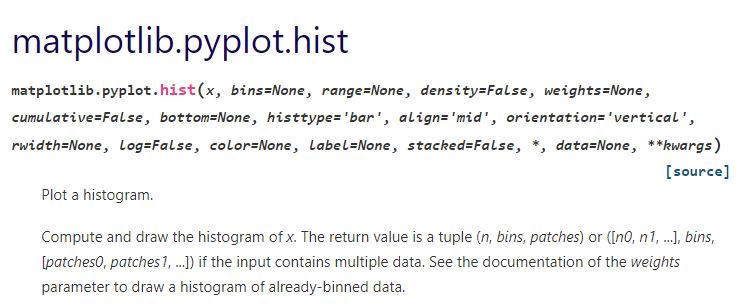

### **Distribución exponencial**
Los fotones viajan en linea recta entre los puntos de interacción con la materia, la distancia media entre estos puntos se conoce como *trayectoria libre media*, y esta sigue una distribución exponencial que se define por

$$f(x) = \frac{1}{\lambda}e^{-\frac{x}{\lambda}}$$ 

En este caso, $\lambda=1/\sigma$, es el inverso de la sección eficaz (cm$^{-1}$), que es una medida de la interacción entre partículas lanzadas contra un centro dispersor (punto de interacción). La idea es simular la generación de estas partículas de acuerdo a esta distribución exponencial.
En general, para generar números aleatorios con una distribución exponencial 
tal que $0<x<\infty$ usamos la formula

$$x = -\lambda\ln(1 -r_i).$$

Esta fórmula se obtiene a partir de la función de distribución 

$$F(x)=r_i=\int_0^x \frac{1}{\lambda}e^{-\frac{x}{\lambda}} dx.$$

pues $F(x)$ garantiza números uniformemente distribuidos en el intervalo $[0,1]$. 

**Ejemplo**:

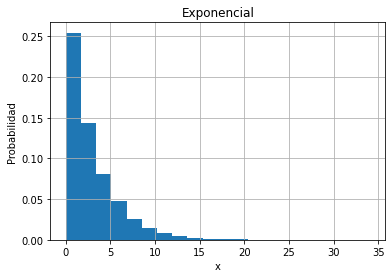

In [42]:
# 1) exponencial usando las librerías de python
n =100000
l=3

r = np.random.rand(n)
x = -l*np.log(1-r)
plt.hist(x, bins=20,density=True)
plt.title("Exponencial")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.grid(True)
plt.show()


### **Distribución Gaussiana**
Hay varias maneras de generar una distribución gaussiana: 
* con el método de Box-Muller,
* por medio del teorema del límite central 
* por el método de Von Neumann:

**1)** [**El método de Box-Muller**](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Box-Muller):
sea $r_1$ y $r_2$ variables aleatorias independientes uniformemente distribuidas en el intervalo $[0, 1)$ entonces

$$x =\sqrt{-2 \ln r_1} \cos(2 \pi r_2)$$

tiene distribución gaussiana. En python existen dos funciones que generan números con distrubución gaussiana a partir de la fórmula de Box-miller,
```python
x = numpy.random.randn(n)  # distribución con desviación estándar (sigma) uno y centrada en cero.
x = numpy.random.normal(size=n) # similar
```
como $x$ tiene desviación estándar de uno y valor medio cero, si se quiere generar un número $x$ con desviación estándar 
$\sigma$ y valor medio $\mu$ se hace el escalamiento,

$$r=\mu+x\sigma.$$

La operación contraria, $x=\frac{r-\mu}{\sigma}$, se conoce como *estandarización*.
Nota, no confundir `randn()` con `rand()` que genera una distribución uniforme.

**Ejemplo**:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


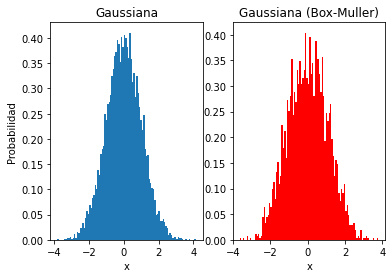

In [47]:
import matplotlib.pyplot as plt
from numpy.random import normal
import numpy as np
from math import sqrt

n =10000

# subplot(fila,columna,posición), ejem: "234" es 2x3 grid, 4th subplot.
plt.subplot(121) 
# 1) Gaussiana usando las librerías de python 
x = normal(size=n)
plt.hist(x, bins=100,density=True)

plt.title("Gaussiana")
plt.xlabel("x")
plt.ylabel("Probabilidad")

# 2) Gaussiana usando el método de Box-Muller
plt.subplot(122)
r1=  np.random.randn(n)
r2=  np.random.randn(n)
x = np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*r2) # x es un array

plt.hist(x, bins=100,density=True, color='r')
plt.title("Gaussiana (Box-Muller)")
plt.xlabel("x")
plt.show()
   


**2) Teorema del límite central**:
Este teorema da una forma simple de generar números con distribución gaussiana (aunque menos eficiente).  Este teorema indica que, en condiciones muy generales, si $x$ es la suma de $N$ variables aleatorias independientes (una secuencia de números ${r_i}$), con media conocida y varianza no nula pero finita, 

$$x = \sum_{i=1}^Nr_i$$

entonces la función de distribución de $x$ "se aproxima bien" a una distribución normal (también llamada distribución gaussiana, curva de Gauss o campana de Gauss)

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} },\,\, \mu=N\langle r\rangle ,\,\, \sigma^2=N(\langle r^2\rangle -\langle r\rangle ^2).$$

Para obtener la distribución, se repite este calculo $M$ veces y así encontrar M valores $x_j$ donde cada $x_j$ es suma $N$ valores $r_i$.

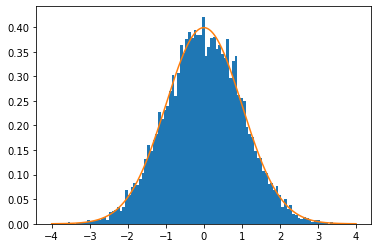

In [63]:
# Gaussiana usando el teorema del limite central
M = 10000
N = 1000

#-- gaussiana teorema del límite central--
h=np.zeros(M)
for i in range(M):
    # generar N eventos con distintas distribuciones:  
    # r=rand(N)+randn(N)+exponential(size=N)+poisson(1,size=N)

    r=np.random.rand(N) # generar N eventos con dist uniforme  
    x=sum(r)         # suma de eventos independientes
    h[i]=x           # guardar x en histograma h
    
h=( h - h.mean() )/h.std() # standarización 
plt.hist(h,bins=100, density=True)    

#-- función de distribución gaussiana teórico -
f = lambda t: 1./np.sqrt(2*np.pi)*np.exp(-t**2./2.) 

t = np.linspace(-4,4,N)
plt.plot(t,f(t))


**3) Método de Von Neumann**: 
considere rectángulo de area $(b-a)W$ con $W=f_{max}$, genere puntos aleatorios $(r_i,y_i)$, si caen bajo la curva gaussiana $f(x)$ se aceptan los $r_i$, sino se rechazan, de esta forma los $r_i$ aceptados tienen distribución gaussiana.
Aunque este método genera números aleatorios con distribución gaussiana  no es eficiente, pues al rechazar se pierden muchos números y tiempo de computación.

**Tarea**: implemente el método de Von Neumann para generar una distribución gaussiana y compare a los métodos anteriores.

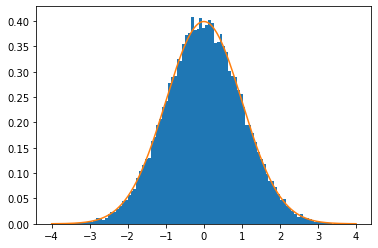

In [65]:
# *** Método de Von Neumann, genera una secuencia con distribución gaussiana ***
M = 100000
W = 0.4   # fmax para función gaussiana.

#-- función de distribución gaussiana teórico --
f = lambda t: 1./np.sqrt(2*np.pi)*np.exp(-t**2./2.) 

r = -4 + np.random.rand(M)*8 # generar r en [-4,4]
y = W*np.random.rand(M)      # generar y en [0, W] 
h = []
for i in range(M):
    if y[i]<=f(r[i]): h=np.append(h,r[i])
                                                                                                     
plt.hist(h, bins=100, density=True)
plt.plot(t,f(t))
plt.show()

0.0 9.0


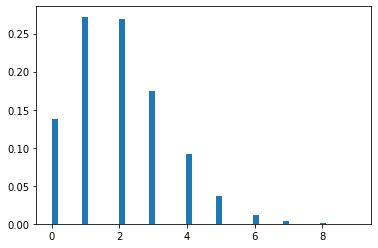

In [53]:
#   *** Distribución de Poisson  *** 

n  = 10000 # numero total de eventos
mu = 2     # rata de eventos(num promedio de eventos por intervalo)

h=[]
for i in range(n):
   k=0; A=1 
   while 1:  
      u = random.random()  # generar num aleatorio en [0,1]
      A = u*A            
    
      if (A <= np.exp(-mu)):
        h = np.append(h,k) # acepte k
        break              # pare
      else:
        k = k + 1          # incremente k
print(h.min(),h.max()) 

plt.hist(h,bins=50,weights=np.ones(n)/n)#, normed=True) 
plt.show()

[1] Landau, R. H., Páez, M. J. (2018). Computational problems for physics. With Guided Solutions Using Python. CRC Press

[2] Krauth, W. (2006). Statistical mechanics: algorithms and computations (Vol. 13). OUP Oxford
